In [1]:
import os,sys
import numpy as np
import xarray as xr
import zarr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

# plota
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}

# from dask.distributed import Client
# import multiprocessing.popen_spawn_posix
# from distributed import Client

# c = Client()
# c

In [2]:
dir_work = '/gws/nopw/j04/isotipic/stajouri/PhD/Jean_Zay_DIRWORK/uor98hu/'
diro = '/home/users/stajouri/Documents/PLOTS/PhD/'

dir_data = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"
# my_regions_masks = xr.open_zarr(dir_data+"my_regions_masks.zarr")
my_regions_masks = xr.open_zarr(dir_data+"my_regions_mask_AI.zarr")
mask_2use= my_regions_masks.mask_AI.compute()


In [3]:
# diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
diri = "/gws/nopw/j04/isotipic/stajouri/PhD/Jean_Zay_DIRWORK/uor98hu/"
# mesh_hgr = xr.open_dataset(diri+'mesh_hgr.nc').squeeze
mesh_hgr = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc').squeeze()
# tmask = mesh_hgr.tmask[0].drop_vars('nav_lev').drop_vars('time_counter')
tmask = mesh_hgr.top_level
nav_lon =  mesh_hgr.nav_lon
nav_lat =  mesh_hgr.nav_lat
e1t = mesh_hgr.e1t.fillna(0)
e2t = mesh_hgr.e2t.fillna(0)


cellArea = e1t * e2t
# masking the cells we ignore in this study (land and sea ice cells)
oceanArea = cellArea.where(mask_2use, drop=True)
totalOceanArea = oceanArea.sum()
Weight = oceanArea / totalOceanArea


centim = 1/2.54  # centimeters in inches
proj = ccrs.Robinson(central_longitude=200) #ccrs.Robinson()
crs = ccrs.PlateCarree()
crs
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
land  = cfeature.NaturalEarthFeature(name='land',scale='50m', category='physical',facecolor='grey')
label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}

lim_l4 = 20 # %
cmap34 = cm.RdYlBu_r 

In [4]:
nexp1 = "ES"

ds_simask = xr.open_zarr(dir_work+"/ETUDE3/ENS_VAR_BUDGET/raw_data/raw_data/"+nexp1+"/"+nexp1+"_SIMASK15_E1980_2018.zarr").SIMASK15_E
sum_simsk = ds_simask.sum(('ens','time_counter')).compute()
si_mask_nexp1 = (sum_simsk.where(sum_simsk==390,0)/390)
si_mask_nexp1 = si_mask_nexp1.where(tmask)

# load data and save COMP _depth perc forced GREENLAND

In [5]:
def do_forced_GREENLAND(COMP,dep):
    # load data
    dir_data = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"
    # dir_data = "/work/scratch-pw3/stajouri/STERIC_THERMO_HALO_2use/"
    nexp2 = "EGAI"
    nexp3 = "EAI"
    ds2 = xr.open_zarr(dir_data+nexp2+"/"+COMP+"/var_terms_39"+"_0_"+dep+".zarr")
    ds3 = xr.open_zarr(dir_data+nexp3+"/"+COMP+"/var_terms_39"+"_0_"+dep+".zarr")
    dsES = xr.open_zarr(dir_data+"ES"+"/"+COMP+"/var_terms_39"+"_0_"+dep+".zarr")

    # compute the difference
    DIFFEAI_ES   = ds2 - ds3
    forced_var_DIFFEAI_ES = DIFFEAI_ES.forced_var
    # forced_var_DIFF_perc_EAI_ES = (forced_var_DIFFEAI_ES / ds3.tot_var) *100 # I was incorrect by dividing by ER
    forced_var_DIFF_perc_EAI_ES = (forced_var_DIFFEAI_ES / dsES.tot_var) *100 # corrrect to be consistent with figure 5 of the paper
    return  forced_var_DIFF_perc_EAI_ES

In [19]:
# dir_data = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/"
# nexp2 = "EAI"
# nexp3 = "ES"
# COMP="HALO"
# dep="2000m"
# print(dir_data+nexp2+"/"+COMP+"/var_terms_39"+"_0_"+dep+".zarr")
# xr.open_zarr(dir_data+nexp2+"/"+COMP+"/var_terms_39"+"_0_"+dep+".zarr")



<xarray.DataArray (y: 1207, x: 1442)>
dask.array<mul, shape=(1207, 1442), dtype=float64, chunksize=(151, 361), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [6]:
print("STERIC","50m", (do_forced_GREENLAND("STERIC","50m").where(mask_2use, drop=True) *Weight).sum().values)
print("STERIC","100m",(do_forced_GREENLAND("STERIC","100m").where(mask_2use, drop=True) *Weight).sum().values)
print("STERIC","300m",(do_forced_GREENLAND("STERIC","300m").where(mask_2use, drop=True) *Weight).sum().values)
print("STERIC","700m",(do_forced_GREENLAND("STERIC","700m").where(mask_2use, drop=True) *Weight).sum().values)
print("STERIC","2000m",(do_forced_GREENLAND("STERIC","2000m").where(mask_2use, drop=True) *Weight).sum().values)
print("STERIC","bottom",(do_forced_GREENLAND("STERIC","bottom").where(mask_2use, drop=True) *Weight).sum().values)

print("THERMO","50m", (do_forced_GREENLAND("THERMO","50m").where(mask_2use, drop=True) *Weight).sum().values)
print("THERMO","100m",(do_forced_GREENLAND("THERMO","100m").where(mask_2use, drop=True) *Weight).sum().values)
print("THERMO","300m",(do_forced_GREENLAND("THERMO","300m").where(mask_2use, drop=True) *Weight).sum().values)
print("THERMO","700m",(do_forced_GREENLAND("THERMO","700m").where(mask_2use, drop=True) *Weight).sum().values)
print("THERMO","2000m",(do_forced_GREENLAND("THERMO","2000m").where(mask_2use, drop=True) *Weight).sum().values)
print("THERMO","bottom",(do_forced_GREENLAND("THERMO","bottom").where(mask_2use, drop=True) *Weight).sum().values)

print("HALO","50m", (do_forced_GREENLAND("HALO","50m").where(mask_2use, drop=True) *Weight).sum().values)
print("HALO","100m",(do_forced_GREENLAND("HALO","100m").where(mask_2use, drop=True) *Weight).sum().values)
print("HALO","300m",(do_forced_GREENLAND("HALO","300m").where(mask_2use, drop=True) *Weight).sum().values)
print("HALO","700m",(do_forced_GREENLAND("HALO","700m").where(mask_2use, drop=True) *Weight).sum().values)
print("HALO","2000m",(do_forced_GREENLAND("HALO","2000m").where(mask_2use, drop=True) *Weight).sum().values)
print("HALO","bottom",(do_forced_GREENLAND("HALO","bottom").where(mask_2use, drop=True) *Weight).sum().values)

STERIC 50m 0.8603439096837827
STERIC 100m 1.3578235999182737
STERIC 300m 4.23693999361283
STERIC 700m 6.060030778707471
STERIC 2000m 4.415391588701283
STERIC bottom 4.50429056746165
THERMO 50m 0.015166624747055261
THERMO 100m -0.03574753714031113
THERMO 300m 2.1100216616471985
THERMO 700m 2.393936450325511
THERMO 2000m 4.078874368030554
THERMO bottom 4.010673587911742
HALO 50m 0.14681072814932628
HALO 100m 0.4710433986052601
HALO 300m 3.4040618588857634
HALO 700m 5.165706860803647
HALO 2000m 4.649858961426239
HALO bottom 3.1934794767657158


# plot figure

In [12]:
COMP="HALO"

figureSI_HALO_FORCED_GIS_all_depth_ranges_correct.png


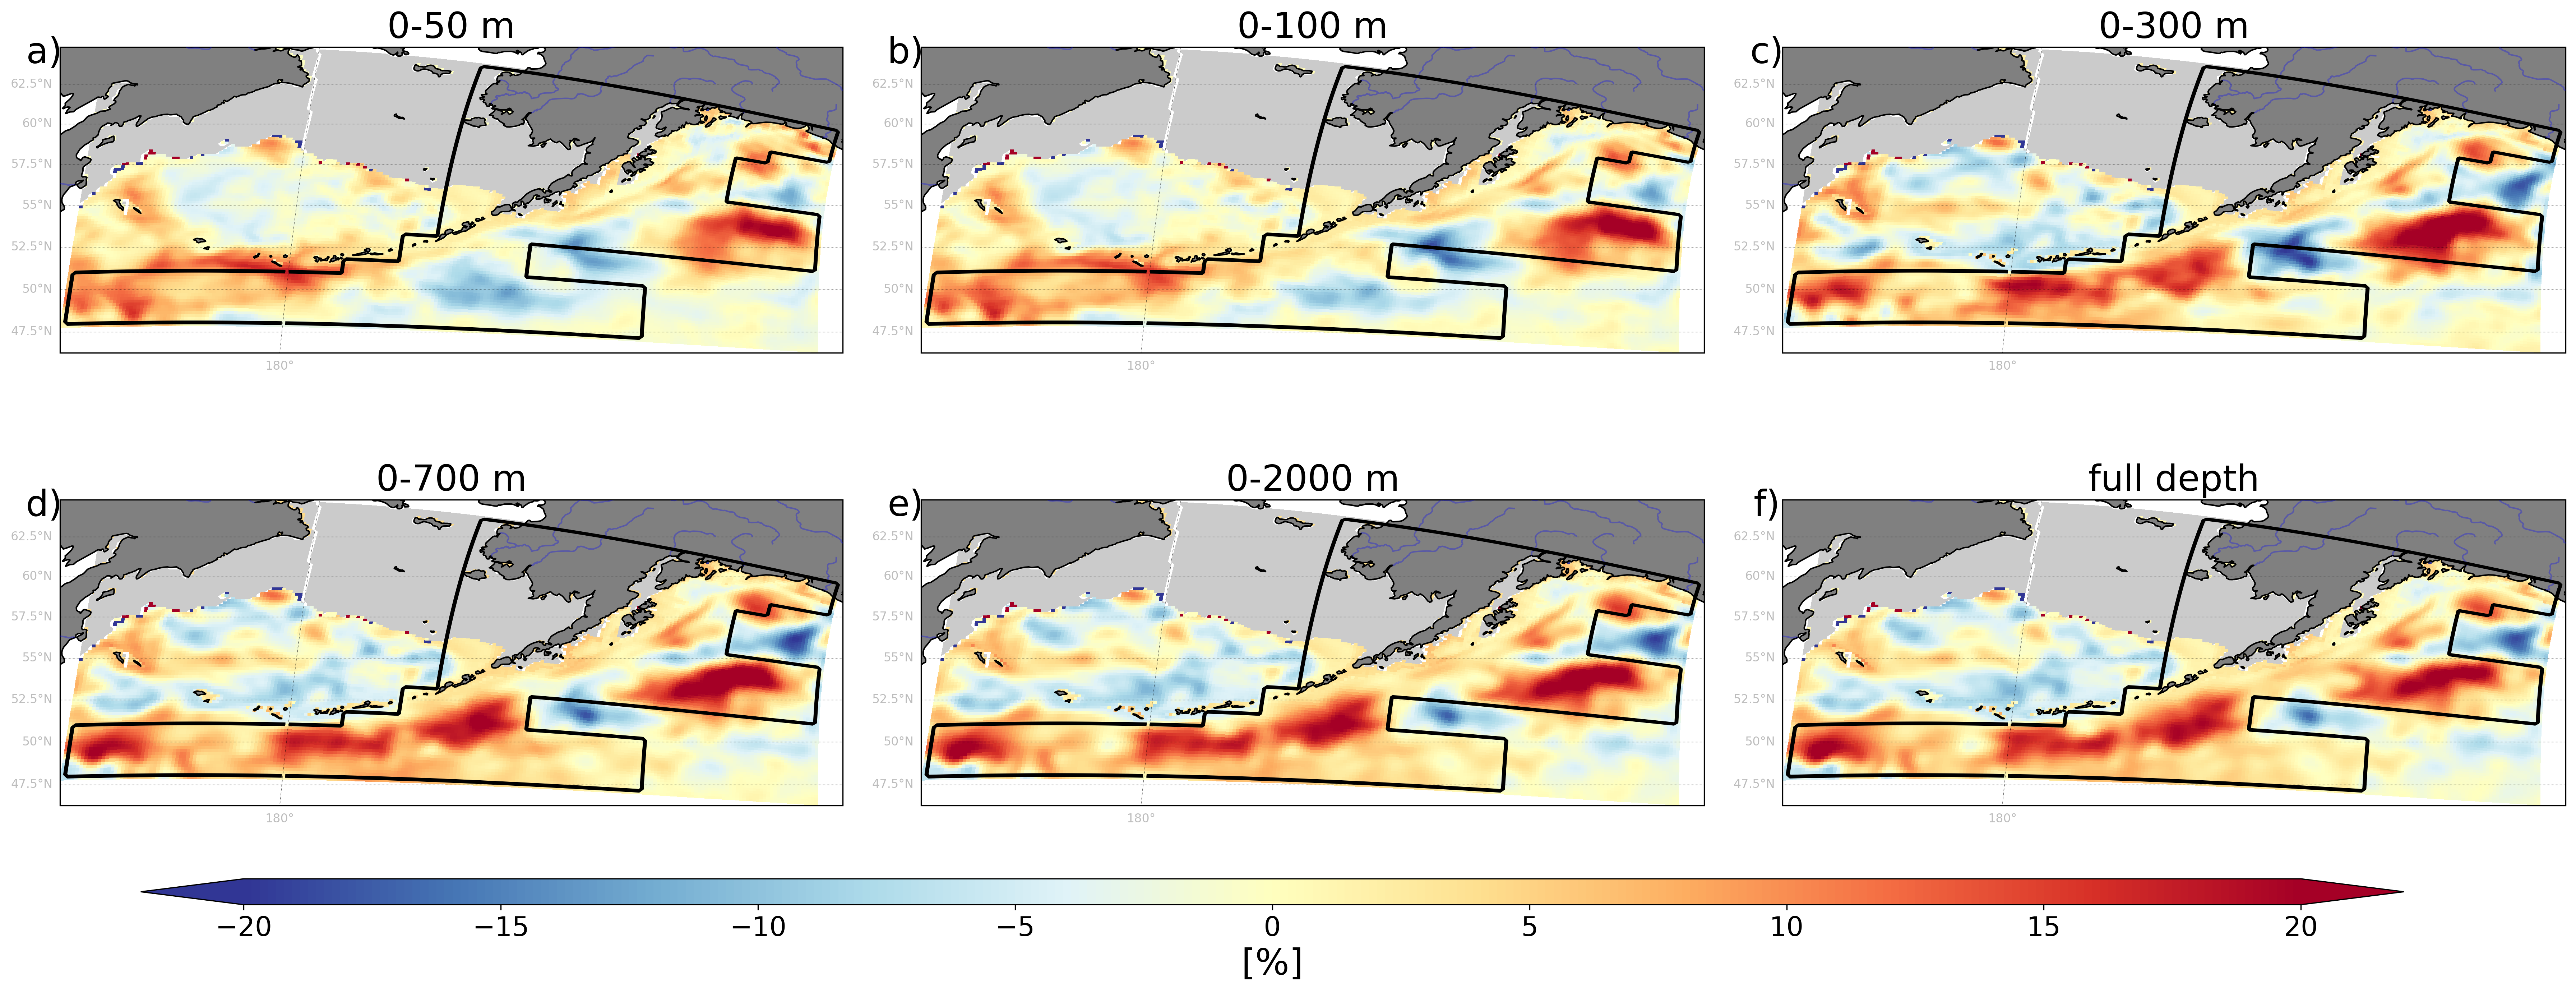

In [13]:
fig, [(axa,axb,axc),(axd,axe,axf) ]= plt.subplots(2,3,figsize=(30,12),facecolor='white', dpi=300,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0.1, hspace=0)


axa.set_title("0-50 m", fontsize=24) 
axb.set_title("0-100 m", fontsize=24) 
axc.set_title("0-300 m", fontsize=24) 
axd.set_title("0-700 m", fontsize=24) 
axe.set_title("0-2000 m", fontsize=24) 
axf.set_title("full depth", fontsize=24)

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.02, 0.98, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)
axd.text(-0.02, 0.98, 'd)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axd.transAxes)
axe.text(-0.02, 0.98, 'e)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axe.transAxes)
axf.text(-0.02, 0.98, 'f)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axf.transAxes)


for ax_name in [axa,axb,axc,axd,axe,axf]:
    # ax_name.coastlines()
    gl = ax_name.gridlines(color='k',alpha=0.5,linewidth=0.33,ls=':', draw_labels=True)#, y_inline=True,)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = label_style; gl.ylabel_style = label_style
    ax_name.add_feature(land, edgecolor='black')
    clr2 = ax_name.add_feature(rivers,alpha=0.3,facecolor='none',edgecolor='blue',zorder=6)
    ax_name.contour(nav_lon[900:1008,365:584],nav_lat[900:1008,365:584],mask_2use.where(nav_lon<0)[900:1008,365:584],1,colors="k",transform=crs,zorder=6)
    ax_name.contour(nav_lon[900:1008,365:584],nav_lat[900:1008,365:584],mask_2use.where(nav_lon>0)[900:1008,365:584],1,colors="k",transform=crs,zorder=6)

    ax_name.contourf(nav_lon[900:1008,365:584],nav_lat[900:1008,365:584],si_mask_nexp1.where(si_mask_nexp1==0).where(nav_lon<0)[900:1008,365:584],1,colors=CB_colors['gray'], transform=crs, alpha=0.5)
    ax_name.contourf(nav_lon[900:1008,365:584],nav_lat[900:1008,365:584],si_mask_nexp1.where(si_mask_nexp1==0).where(nav_lon>0)[900:1008,365:584],1,colors=CB_colors['gray'],transform=crs, alpha=0.5)

#--------------------- premiere ligne  --------------------------------------
cs= axa.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"50m").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap =cmap34, transform=crs,  vmin =-lim_l4, vmax=lim_l4)
cs= axb.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"100m").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)
cs= axc.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"300m").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)

#--------------------- deuxieme ligne  --------------------------------------
cs= axd.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"700m").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap =cmap34, transform=crs,  vmin =-lim_l4, vmax=lim_l4)
cs= axe.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"2000m").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)
cs= axf.pcolormesh(nav_lon[900:1008,365:584], nav_lat[900:1008,365:584], do_forced_GREENLAND(COMP,"bottom").where(si_mask_nexp1)[900:1008,365:584][:-1,:-1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)

############--------------------------------------------
fig.subplots_adjust(bottom=0.18)
cbar_ax = fig.add_axes([0.15, 0.16, 0.7, 0.02])  #(left, bottom, width, height)

# ticklabels=np.arange(-0.5,2.5,0.5)
# new_tickslabels = [np.round(10**y,1) for y in ticklabels]

cbar = fig.colorbar(cs,extend='both', cax=cbar_ax, orientation='horizontal') #, ticks=ticklabels) # pad = 0.025, shrink=0.9) ticks=bounds,
cbar.ax.tick_params(labelsize=18)
# cbar.set_ticklabels(new_tickslabels)
# cbar.ax.set_title('$log_{10}(cm^{2})$',size=14)
cbar.set_label('[%]', fontsize=24)
# cbar.set_ticks(ticks=np.arange(-0.5,2.5,0.5))


namo = "figureSI_"+COMP+"_FORCED_GIS_all_depth_ranges_correct.png"
print(namo)
# fig.tight_layout(pad=0, h_pad=0.2, w_pad=0.1)
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none',
# plt.close(fig)

In [14]:
diro


'/home/users/stajouri/Documents/PLOTS/PhD/'

In [ ]:
figureSI_STERIC_FORCED_GIS_all_depth_ranges_correct.png
figureSI_THERMO_FORCED_GIS_all_depth_ranges_correct.png
figureSI_HALO_FORCED_GIS_all_depth_ranges_correct.png